In [1]:
import numpy as np
from astropy.io import fits
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
from plottingTools import makeStamps
import pandas as pd

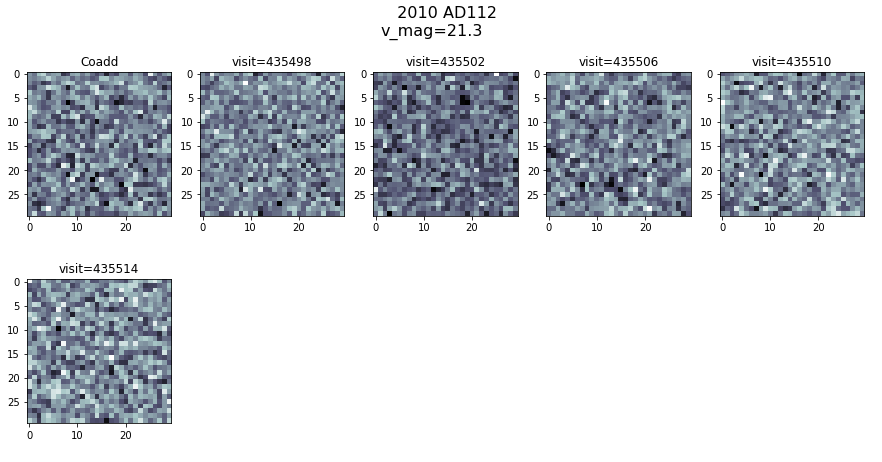

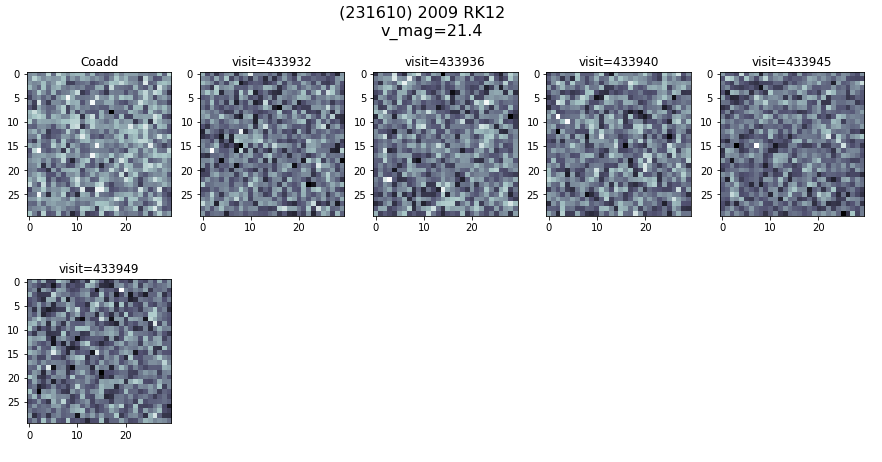

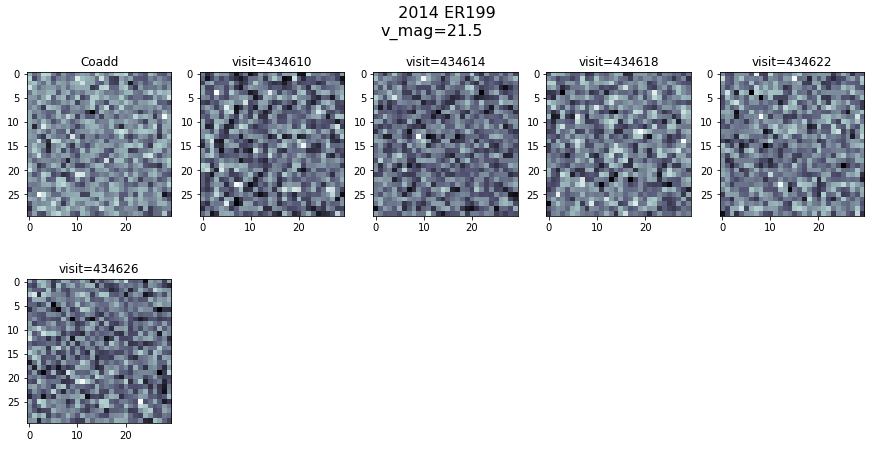

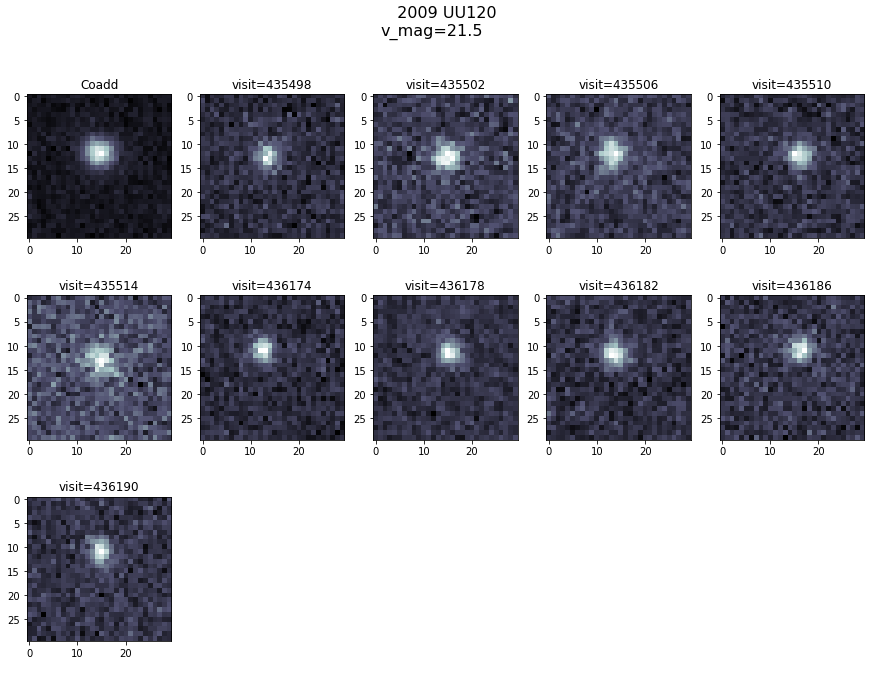

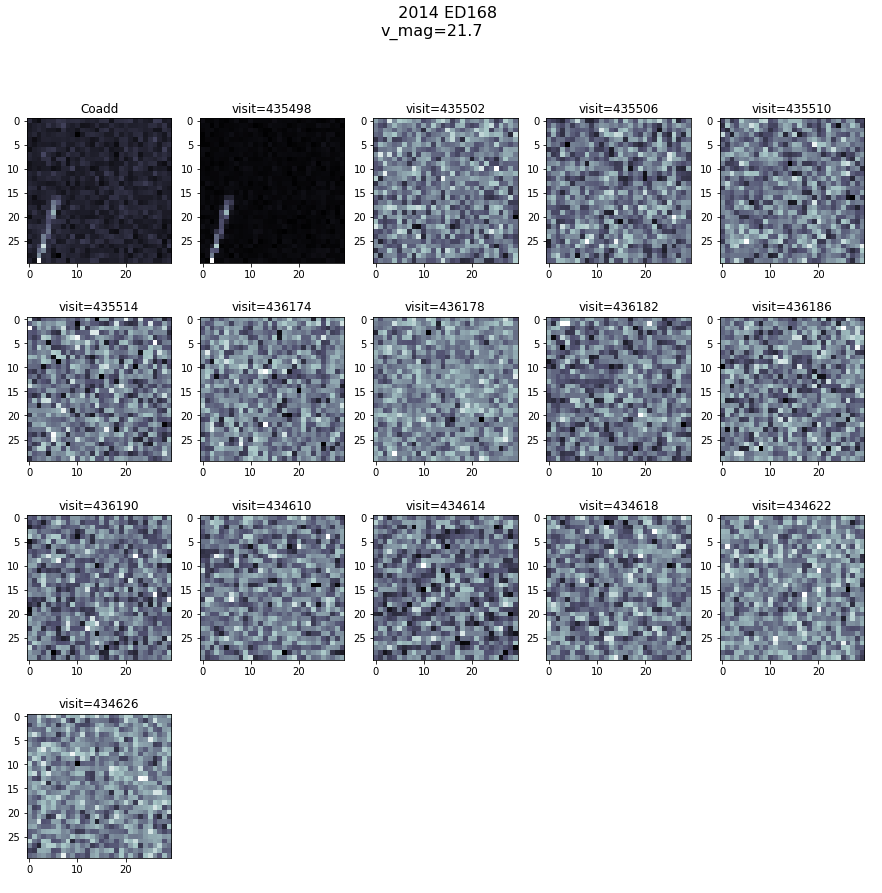

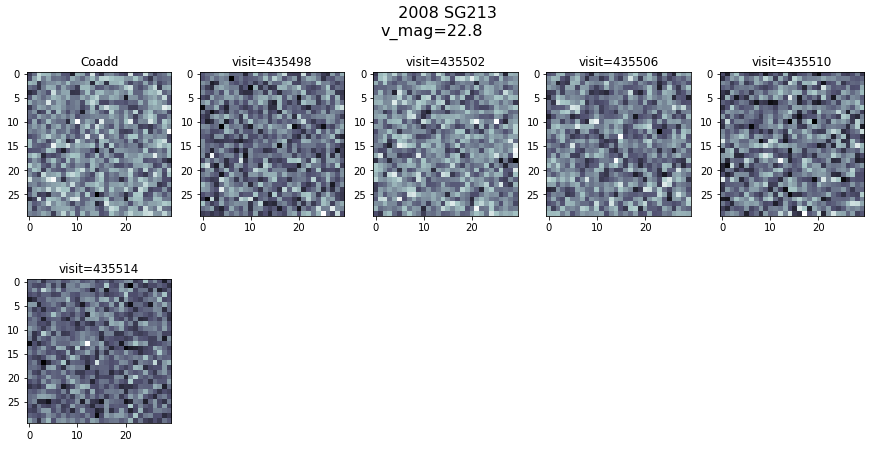

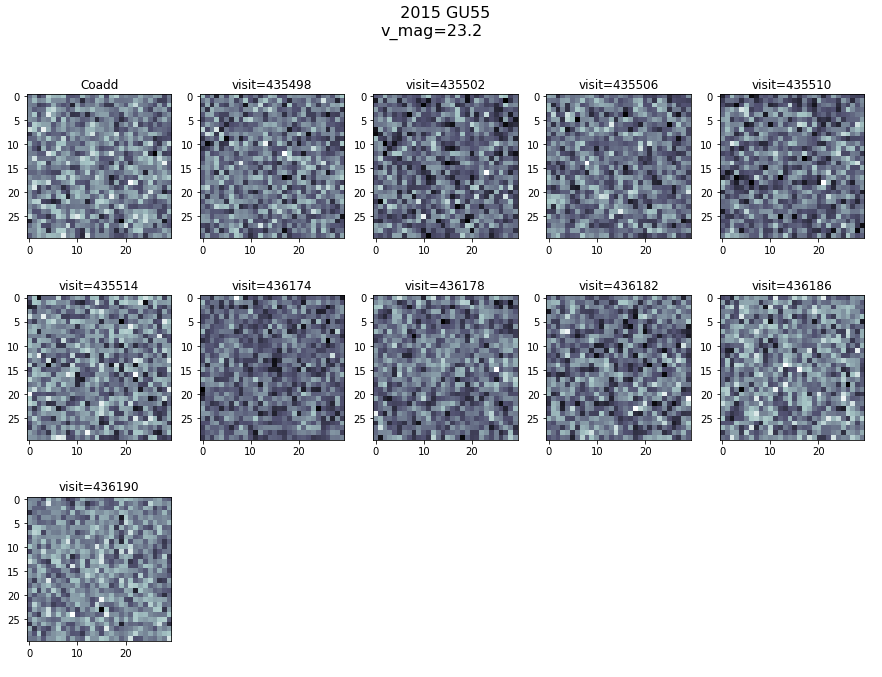

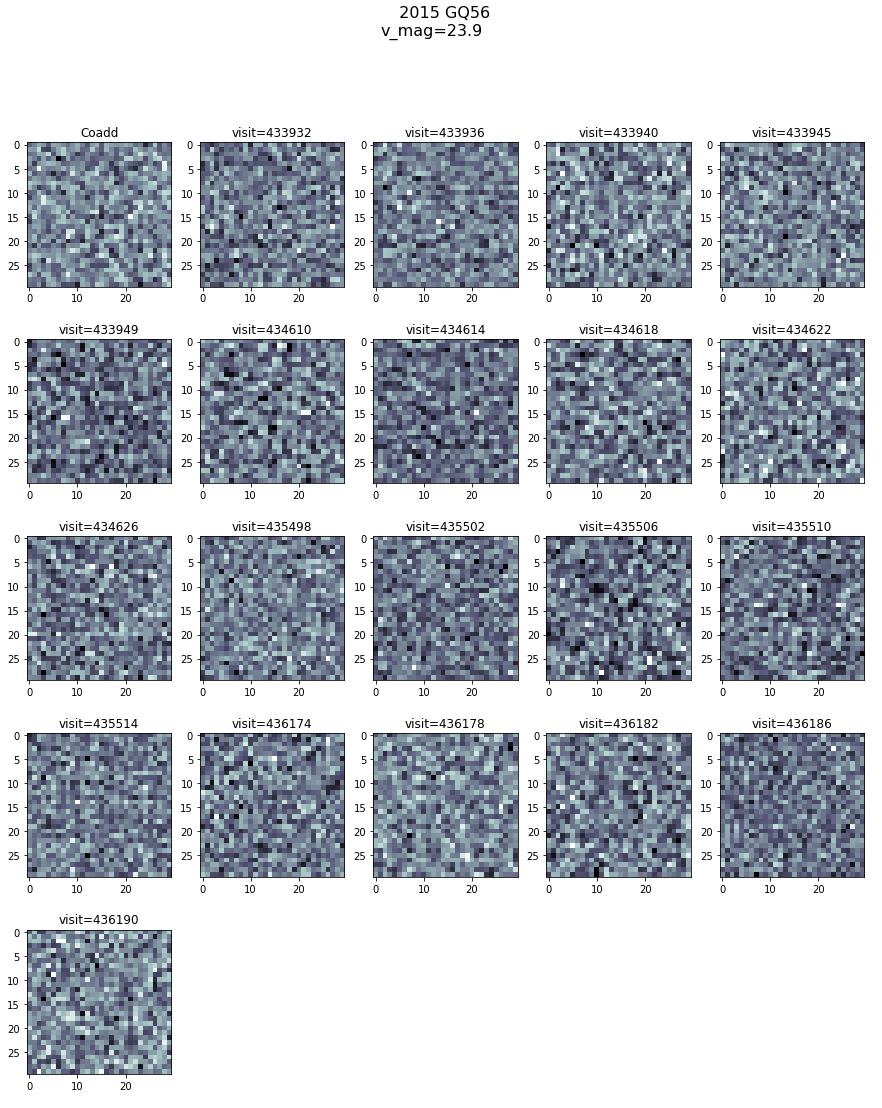

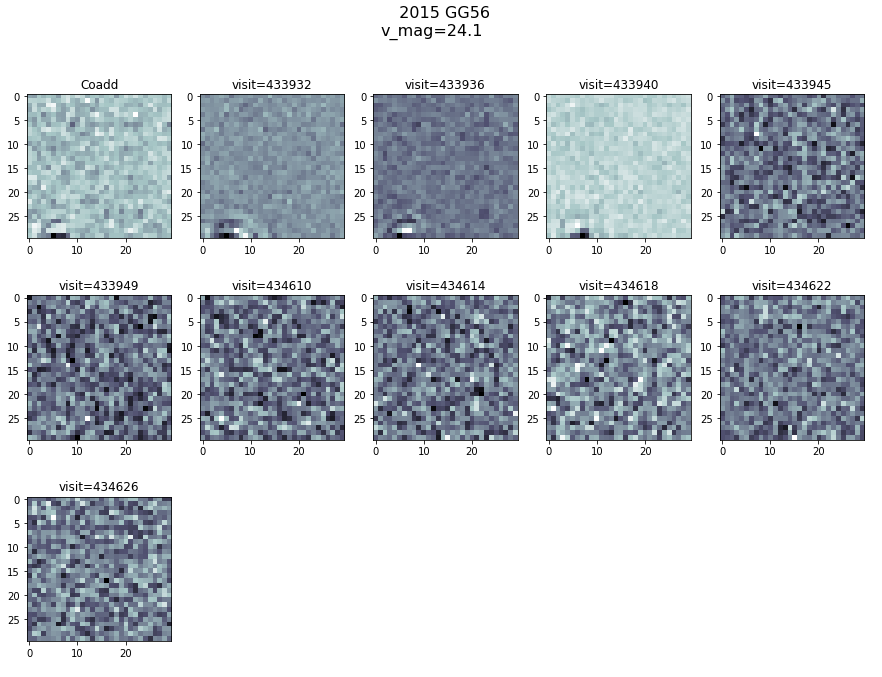

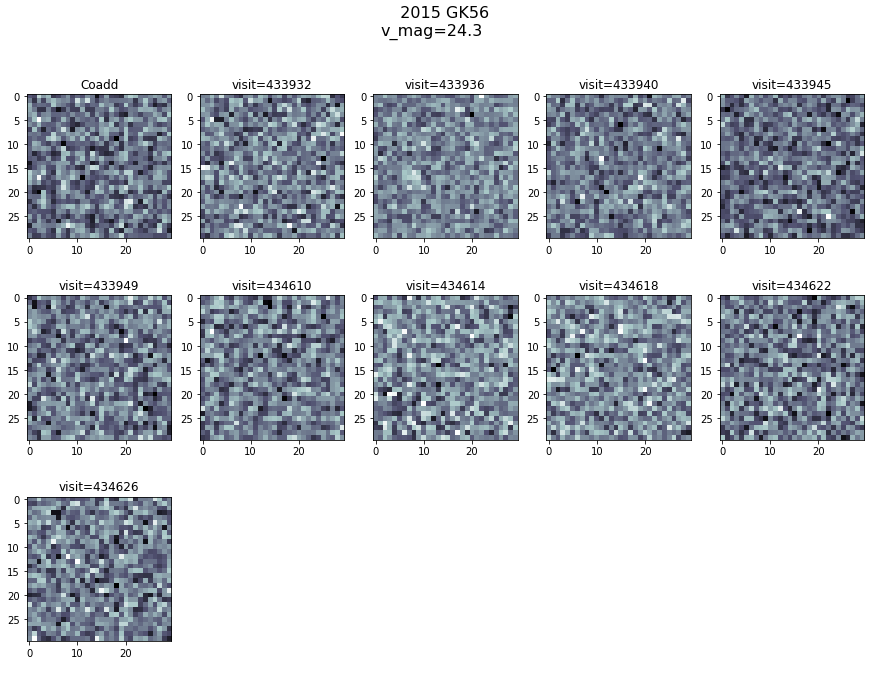

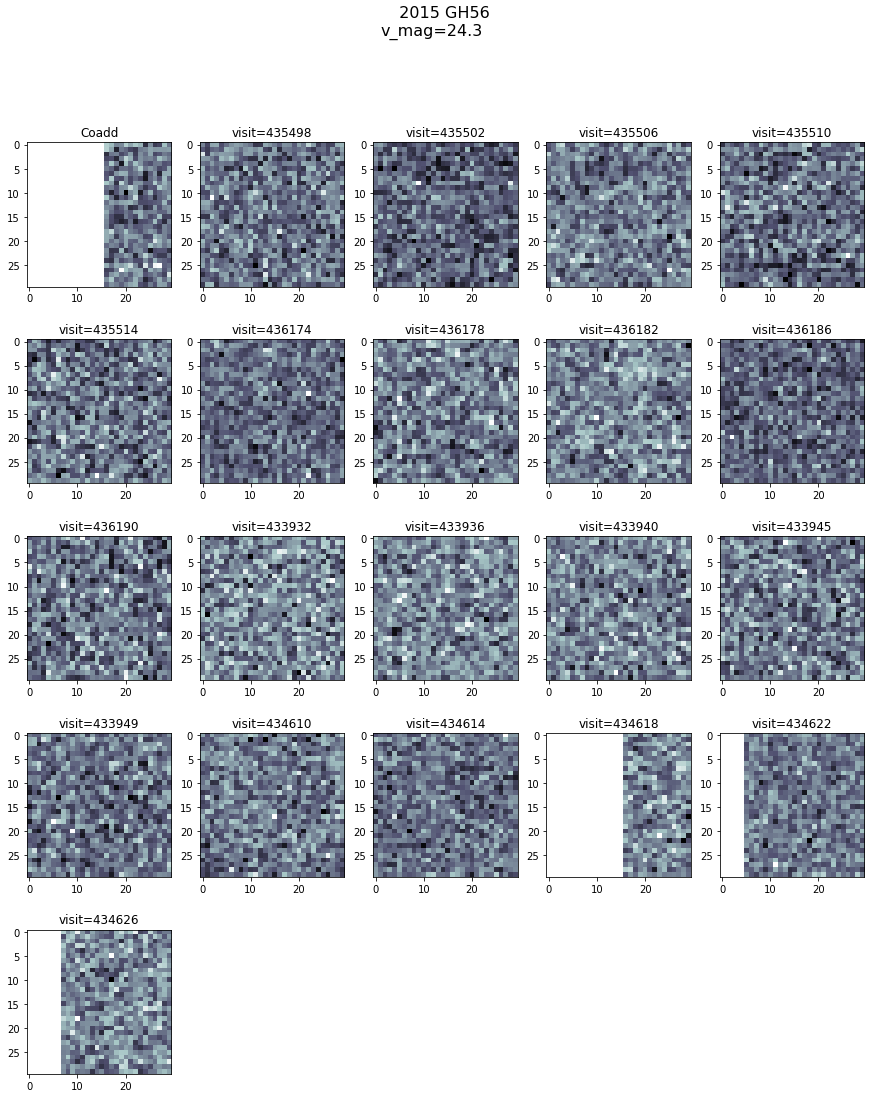

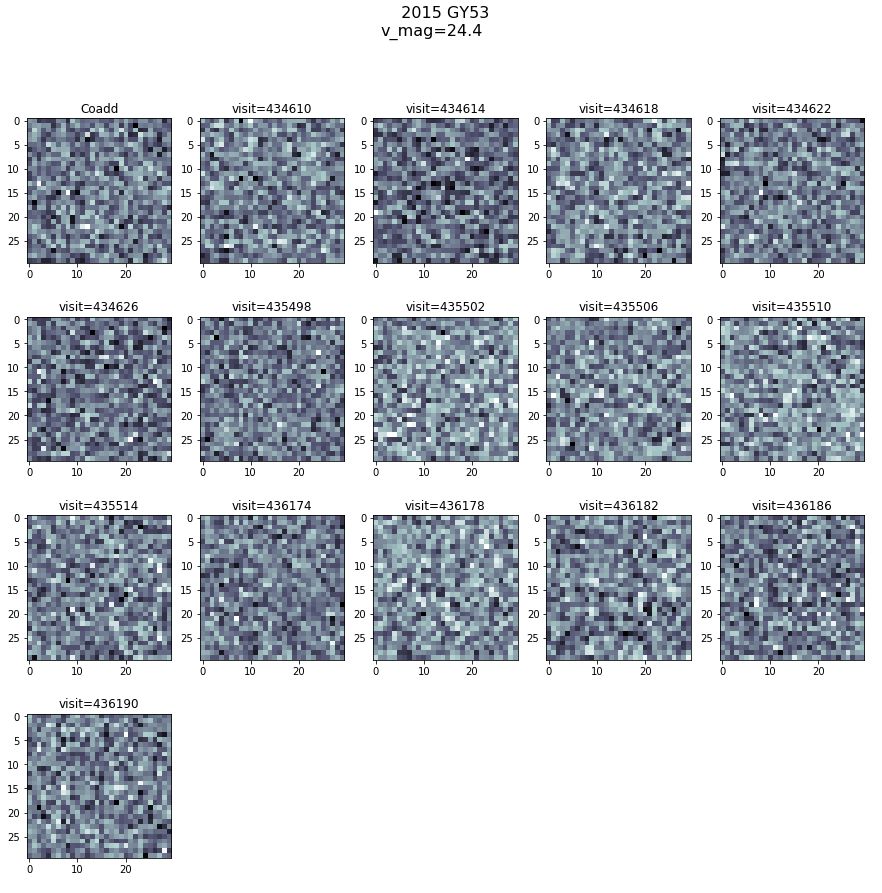

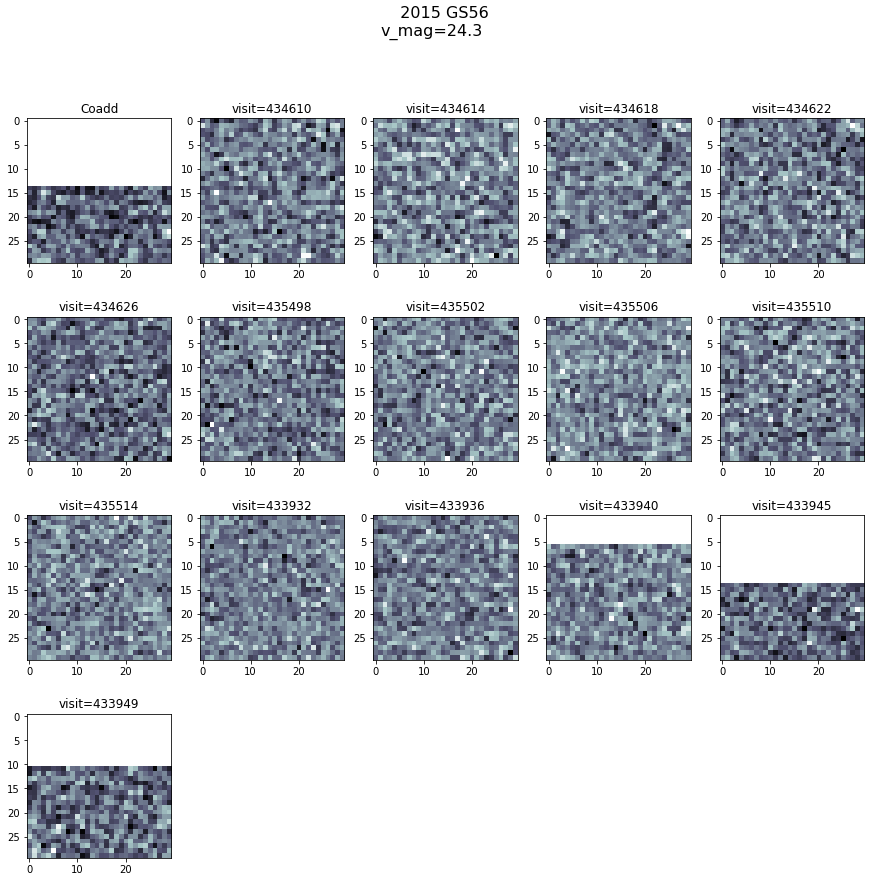

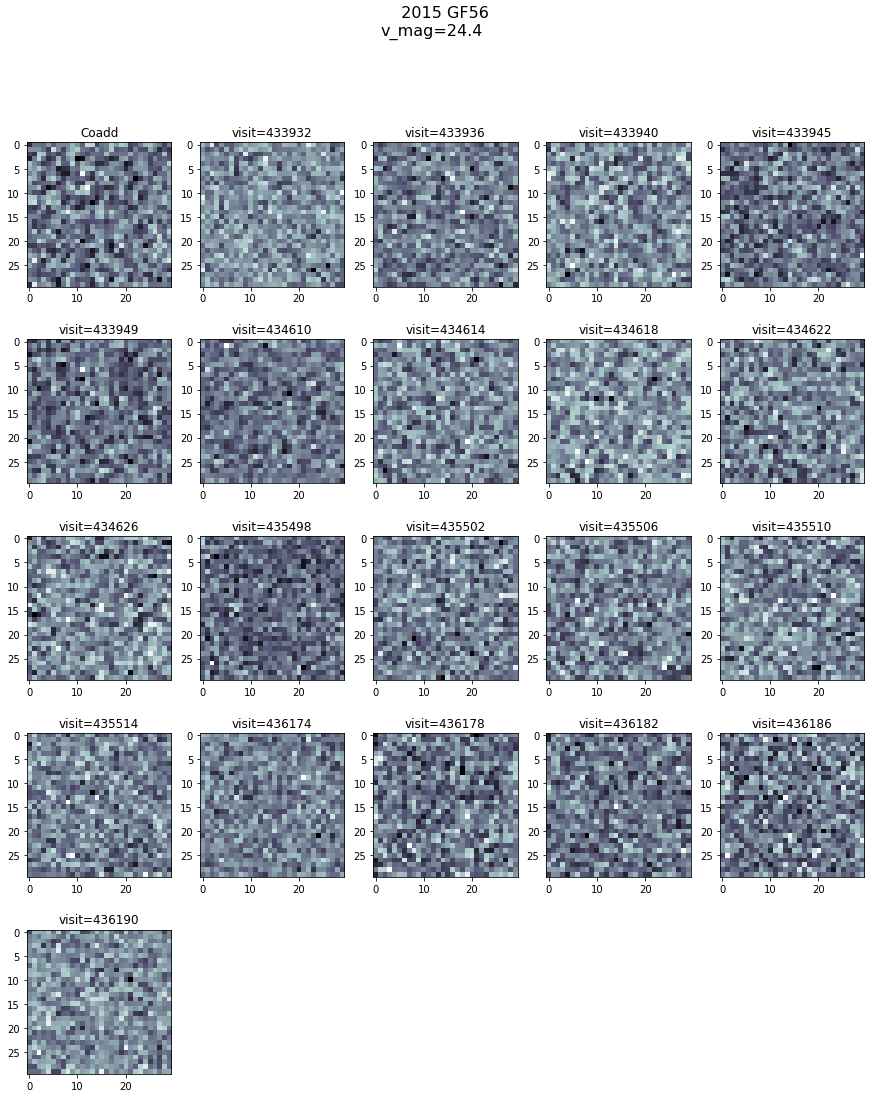

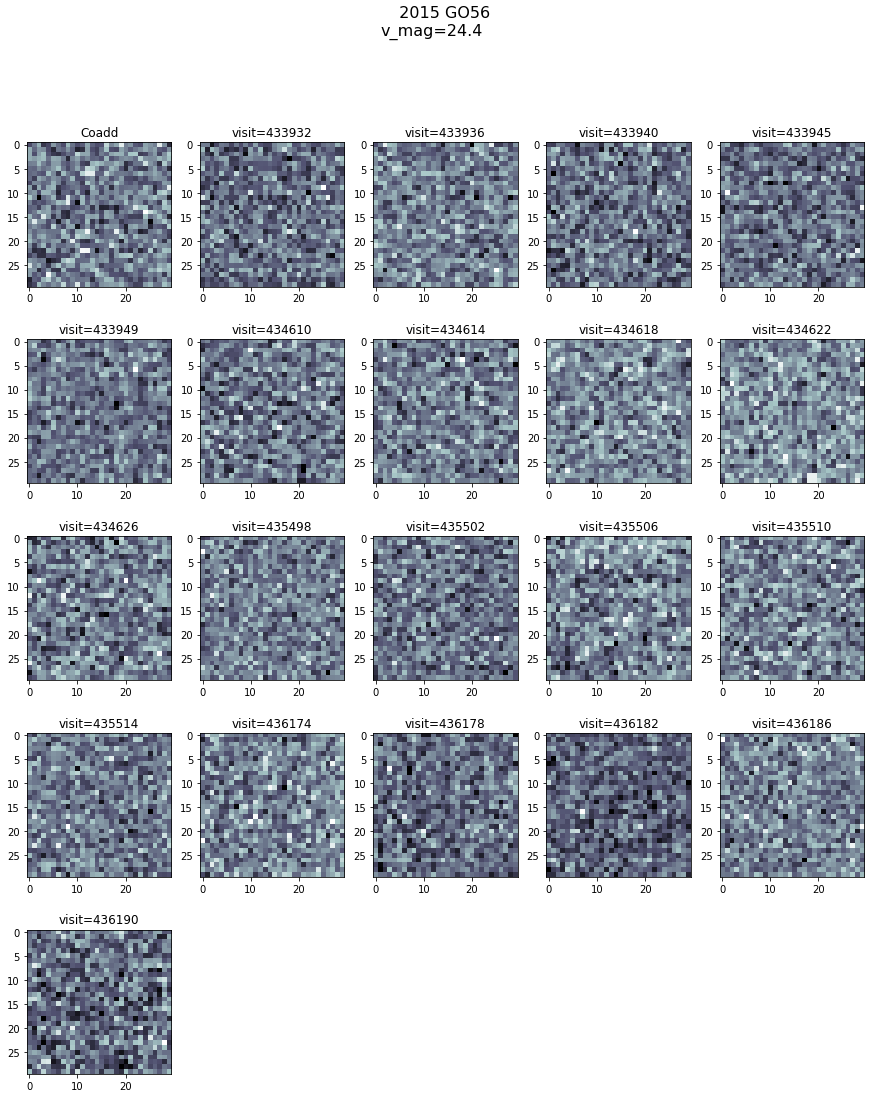

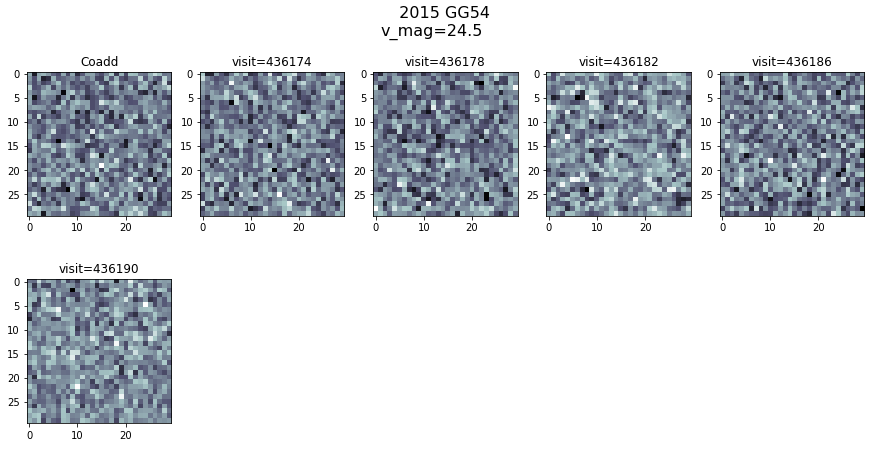

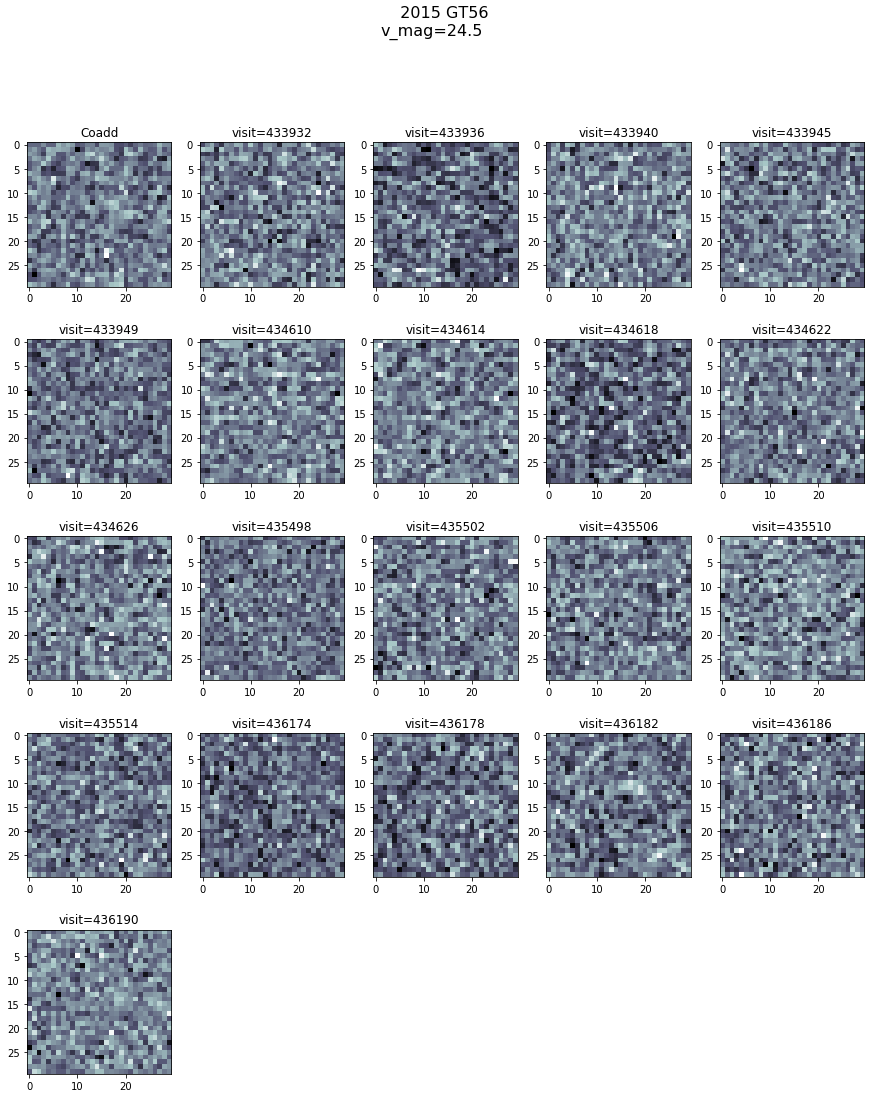

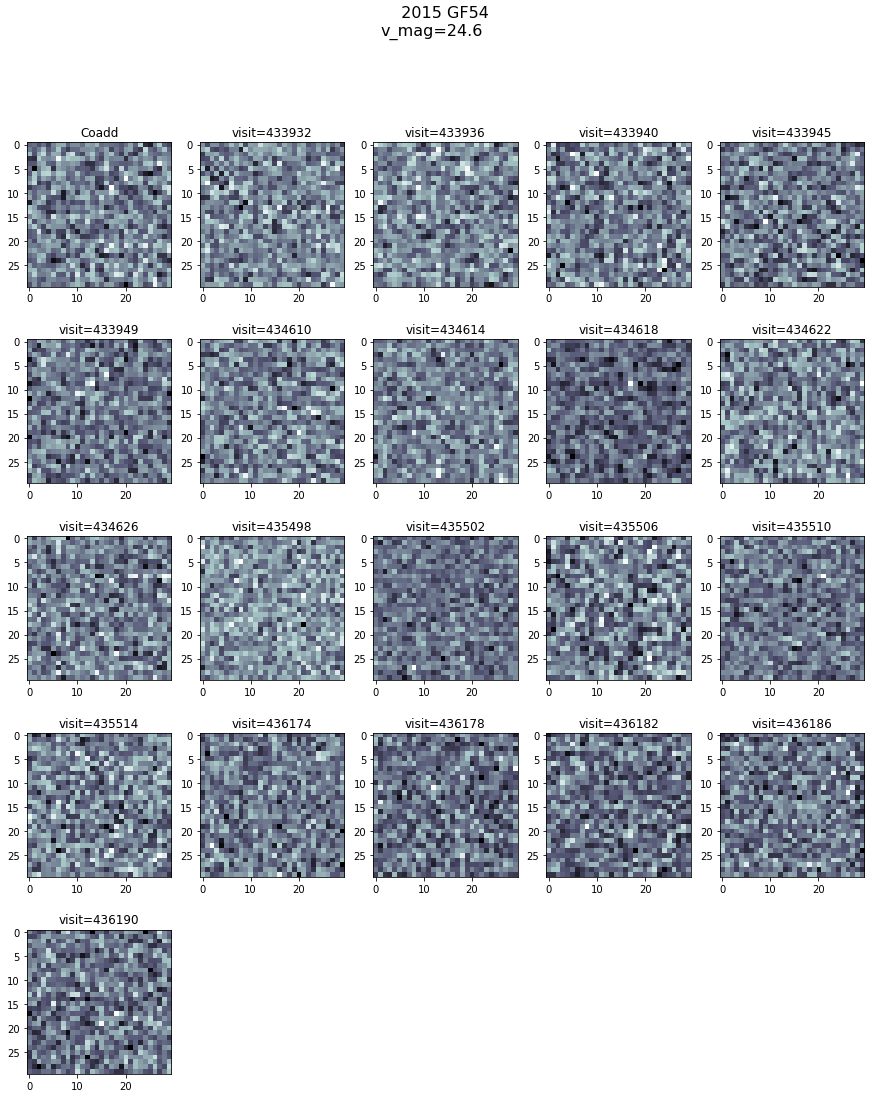

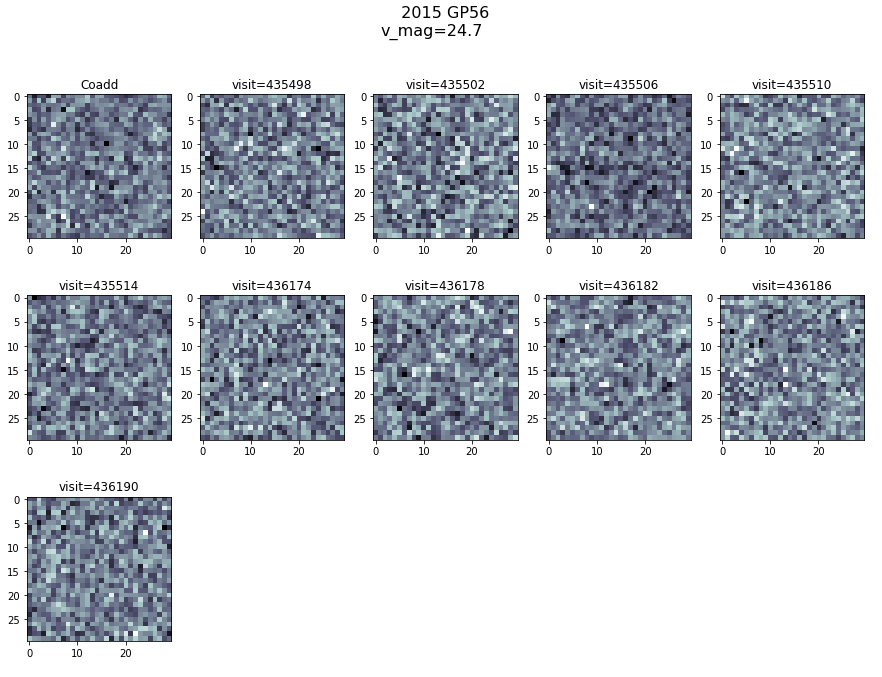

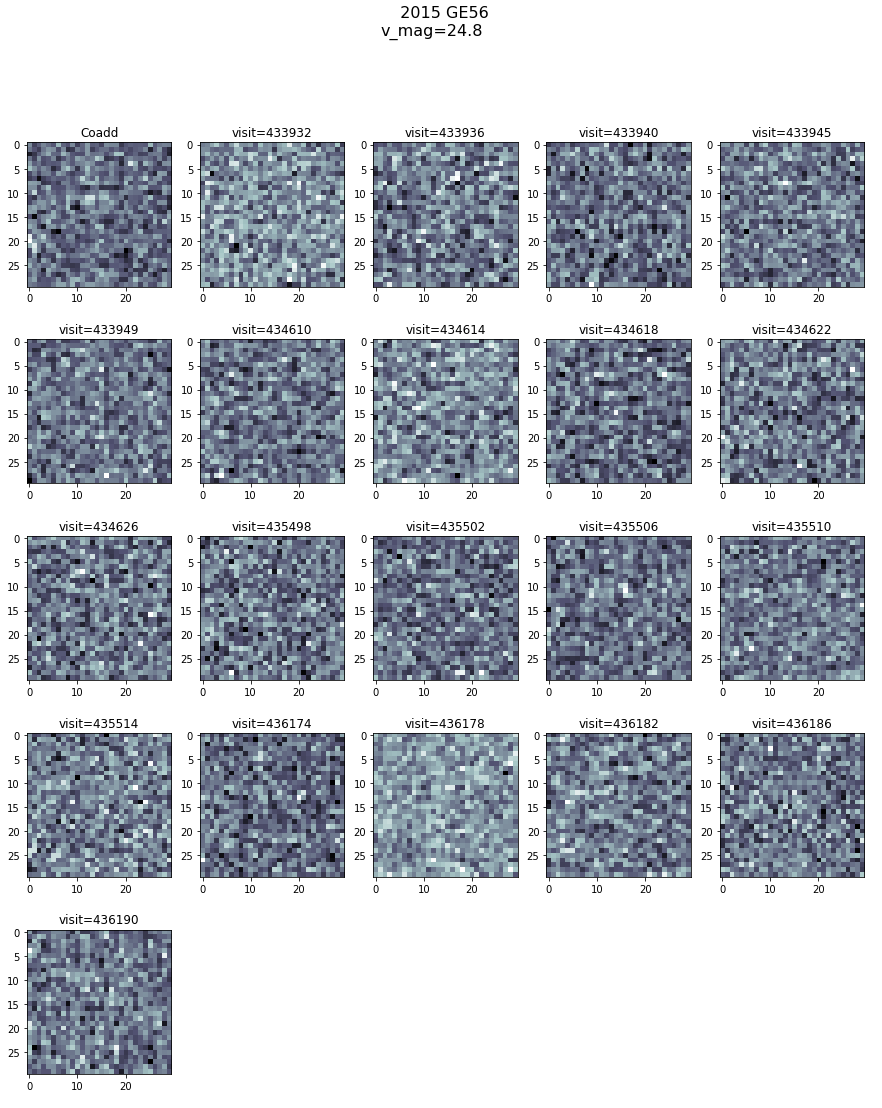

In [2]:
with open('PickledPointings.pkl', 'rb') as f:
    Pointing_Groups = pickle.load(f)

# Set initial parameters
# Set file path to the data.
# Group num, ccd num, and visit id must be enterable with the .format member
filepath = '/astro/store/epyc/users/smotherh/DECAM_Data_Reduction/Pointing_Group_300/warps/{:03}/{:02}/'
# Pointing group number. See PickledPointings.pkl for more info
groupnum=300
# DECam ccd number
ccd=41

# Read in a list of mpc objects
# List is generated in query_MPC.ipynb
objectList = pd.read_csv('objects300.txt')
# Remove old pandas indicies
objectList.drop(columns='Unnamed: 0',inplace=True)
# Generate a list of names and sort by magnitude
cutOL = objectList.drop_duplicates('name')
cutOL = cutOL.sort_values('v_mag')
## Make cuts to the object_list dataframe in order to select the object of interest
#cutOL = objectList[(objectList['ccd']==ccd) & (objectList['visit_id']==visit_id) & (objectList['v_mag']<22)]
for name in cutOL['name'].get_values():
    makeStamps(name,objectList,filepath.format(groupnum,ccd))

In [73]:
# Plot the whole image
fig,ax = plt.subplots(figsize=[8,24])
im = ax.imshow(hdul[1].data,cmap=plt.cm.gray,vmin=0,vmax=50)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.05)
cbar = plt.colorbar(im, cax=cax, format="%.2f")

0